## Regressão linear - preços de carros
***

**Fonte**: https://www.kaggle.com/hellbuoy/car-price-prediction?select=CarPrice_Assignment.csv  

O objetivo é criar um modelo de machine learning utilizando a técnica de **Regressão Linear**, que faça previsões sobre os preços de carros a partir das características apresentadas no dataset.

In [135]:
import pandas as pd

In [136]:
dados = pd.read_csv('CarPrice_Assignment.csv')
dados.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


As variáveis fueltype (tipo de combustível) e doornumber (número de portas) podem ter algum efeito em nosso modelo. Então, vou trocar a representação dos dados nessas variáveis.

In [137]:
dados.fueltype.unique()

array(['gas', 'diesel'], dtype=object)

In [138]:
dados.fueltype = dados.fueltype.map({'gas' : 0, 'diesel': 1})


|fueltype||ID|
|---||---|
|gas||0|
|diesel||1|

In [139]:
dados.doornumber.unique()

array(['two', 'four'], dtype=object)

In [140]:
dados.doornumber = dados.doornumber.map({'two' : 0, 'four': 1})

|doornumber||ID|
|---||---|
|two||0|
|fuor||1|

#### Estatísticas descritivas e tabela de correlação

In [141]:
dados.describe()

,car_ID,symboling,fueltype,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,0.097561,0.560976,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,0.297446,0.497483,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,0.000000,0.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,0.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,0.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,0.000000,1.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,1.000000,1.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [142]:
dados.corr()

,car_ID,symboling,fueltype,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.125568,0.190352,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.194311,-0.664073,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
fueltype,0.125568,-0.194311,1.000000,0.191491,0.308346,0.212679,0.233880,0.284631,0.217275,0.069594,0.054451,0.241829,0.984356,-0.163926,-0.476883,0.255963,0.191392,0.105679
doornumber,0.190352,-0.664073,0.191491,1.000000,0.447357,0.398568,0.207168,0.552208,0.197379,0.020742,0.119258,-0.011082,0.177888,-0.126947,-0.247668,-0.012417,-0.036330,0.031835
wheelbase,0.129729,-0.531954,0.308346,0.447357,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.212679,0.398568,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.233880,0.207168,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.284631,0.552208,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.217275,0.197379,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.069594,0.020742,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145


Pela tabela podemos ver que fueltype (tipo de combustível) tem correlação de 0.1 com a variável preço e doornumber (número de portas) tem 0.03. As que possuem um nivel maior de correlação são:
- carlength (compriemnto do carro)
- carheight (altura do carro)
- curbweight (peso-meio-fio)
- enginesize (tamanho do motor)
- horsepower (cavalos) 

#### Selecionando e trocando nomes das variáveis

In [143]:
dados_carros = dados[['price', 'carlength', 'carheight', 'curbweight', 'enginesize', 'horsepower']]

In [144]:
dados_carros.columns = ['preco', 'comp_do_carro', 'alt_do_carro', 'peso_meio_fio', 'tam_do_motor', 'cavalos']
dados_carros.head()

,preco,comp_do_carro,alt_do_carro,peso_meio_fio,tam_do_motor,cavalos
0,13495.0,168.8,48.8,2548,130,111
1,16500.0,168.8,48.8,2548,130,111
2,16500.0,171.2,52.4,2823,152,154
3,13950.0,176.6,54.3,2337,109,102
4,17450.0,176.6,54.3,2824,136,115


### Análises gráficas

#### Box plot da variável *dependente* (y)

In [145]:
import seaborn as sns

<AxesSubplot:title={'left':'Variável y'}, xlabel='Preços'>

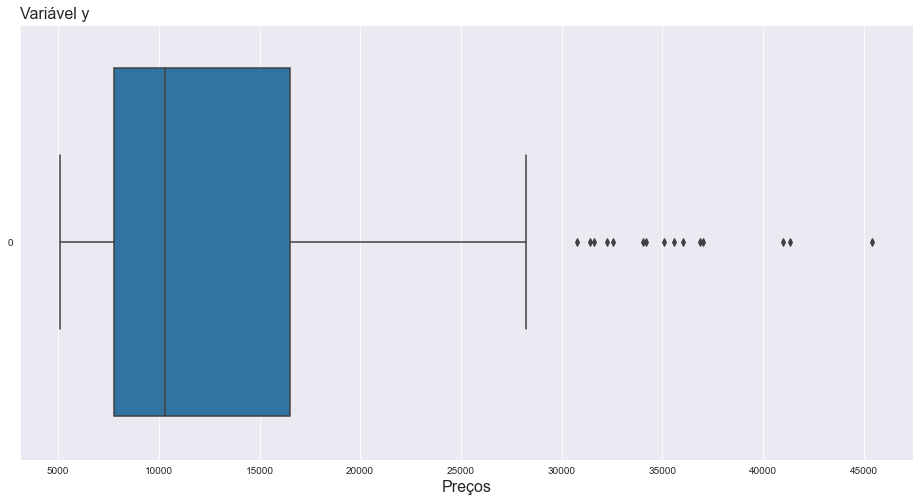

In [146]:
sns.set_style('darkgrid')
grafico = sns.boxplot(data = dados_carros.preco, orient = 'h')
grafico.figure.set_size_inches(16,8)
grafico.set_title('Variável y', fontsize = 16, loc = 'left')
grafico.set_xlabel('Preços', fontsize = 16)
grafico

#### Eliminando outliers

Antes de começar o modelo, vou eliminar os outliers, pois podem atrapalhar o modelo.

In [147]:
selecao = dados_carros.preco >= 27000
dados_carros = dados_carros[~selecao]
dados_carros.query('preco > 27000')

,preco,comp_do_carro,alt_do_carro,peso_meio_fio,tam_do_motor,cavalos


<AxesSubplot:title={'left':'Variável y'}, xlabel='Preços'>

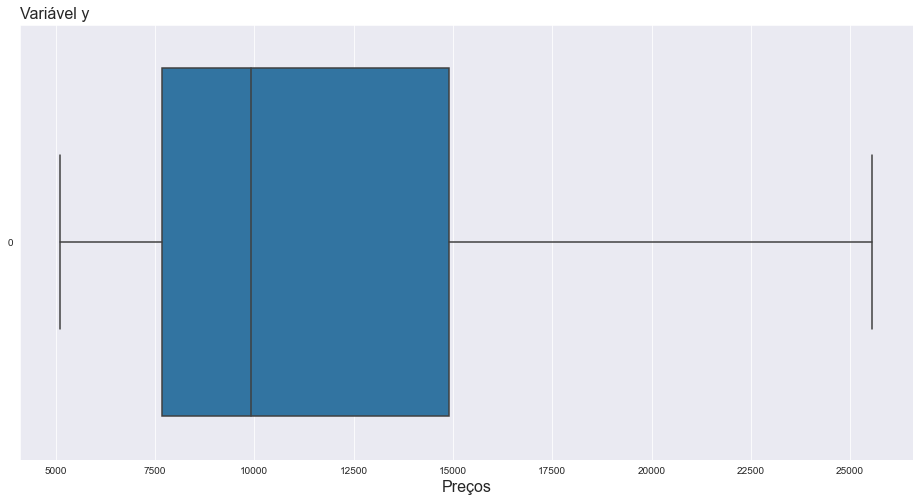

In [148]:
sns.set_style('darkgrid')
grafico = sns.boxplot(data = dados_carros.preco, orient = 'h')
grafico.figure.set_size_inches(16,8)
grafico.set_title('Variável y', fontsize = 16, loc = 'left')
grafico.set_xlabel('Preços', fontsize = 16)
grafico

C:\Users\felip\anaconda3\envs\felipe-pandas\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'left':'Distribuição variável preço'}, xlabel='Preços', ylabel='Density'>

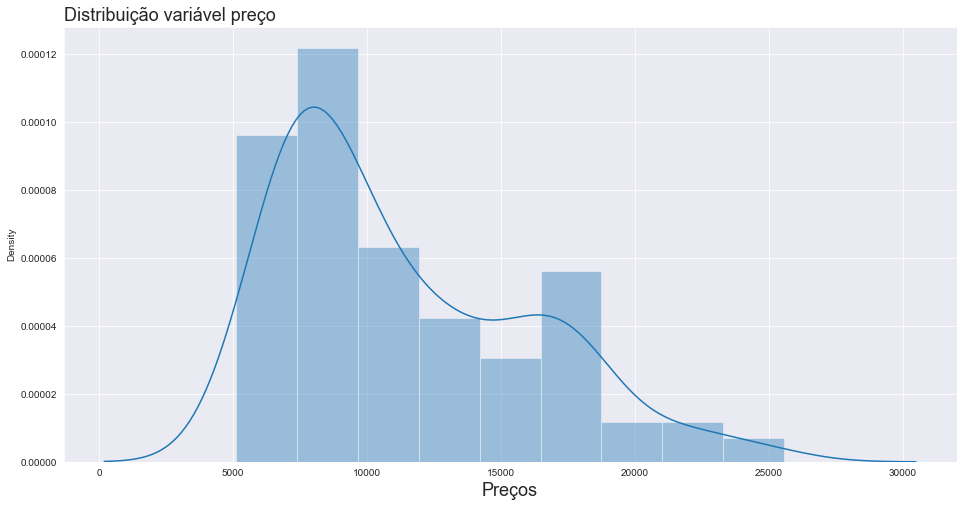

In [149]:
grafico = sns.distplot(dados_carros.preco)
grafico.figure.set_size_inches(16, 8)
grafico.set_title('Distribuição variável preço', fontsize = 18, loc = 'left')
grafico.set_xlabel('Preços', fontsize = 18)
grafico

Com o distplot, é possível perceber que a variável y possui uma distribuição assimétrica à direita.

### Gráficos de dispersão entre as variáveis

In [150]:
dados_carros.head(2)

,preco,comp_do_carro,alt_do_carro,peso_meio_fio,tam_do_motor,cavalos
0,13495.0,168.8,48.8,2548,130,111
1,16500.0,168.8,48.8,2548,130,111


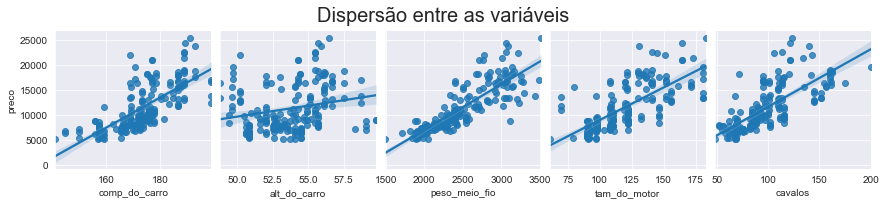

In [151]:
grafico = sns.pairplot(dados_carros, y_vars = 'preco',
                      x_vars = ['comp_do_carro', 'alt_do_carro', 'peso_meio_fio', 'tam_do_motor', 'cavalos'],
                      kind = 'reg')
grafico.fig.suptitle('Dispersão entre as variáveis', fontsize = 20, y = 1.1)
grafico

Os gráficos mostram que os preços dos carros aumentam conforme aumenta o valor das variáveis explicativas x.

## <font color='darkblue'>Estimando um Modelo de Regressão Linear</font>

In [152]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [153]:
variavel_y = dados_carros['preco']
variaveis_x = dados_carros[['comp_do_carro', 'alt_do_carro', 'peso_meio_fio', 'tam_do_motor', 'cavalos']]

In [154]:
X_treino, X_teste, y_treino, y_teste = train_test_split(variaveis_x, variavel_y, test_size = 0.3, random_state = 2811)

In [155]:
modelo = LinearRegression()

In [156]:
modelo.fit(X_treino, y_treino)

LinearRegression()

#### Obtendo o coeficiente de determinação (R²)

In [157]:
modelo.score(X_treino, y_treino)

0.765617543809947

O coeficiente de determinação mostra quanto a linha de regressão está ajustada aos dados e varia entre 1 e 0.
> 0.765 é um valor muito bom.

#### Previsões

In [158]:
previsao = modelo.predict(X_teste)

#### Obtendo o coeficiente de determinação (R²) para as previsões

In [159]:
metrics.r2_score(y_teste, previsao)

0.6604380481798975

### Simulador simples

In [160]:
entrada = X_teste[41:42]
entrada

,comp_do_carro,alt_do_carro,peso_meio_fio,tam_do_motor,cavalos
8,192.7,55.9,3086,131,140


In [161]:
modelo.predict(entrada)[0]

17666.961360493166

In [162]:
comp_do_carro = 150 
alt_do_carro = 45
peso_meio_fio = 2000
tam_do_motor = 100
cavalos = 65
entrada = [[comp_do_carro, alt_do_carro, peso_meio_fio, tam_do_motor, cavalos]]

In [163]:
modelo.predict(entrada)[0]

6197.149395838271

### Obtendo métricas do modelo

In [164]:
import numpy as np

In [165]:
erro_quadratico_medio = metrics.mean_squared_error(y_teste, previsao).round(2)

In [166]:
raiz_do_erro = np.sqrt(erro_quadratico_medio).round(2)

In [167]:
coeficiente_de_determinacao = metrics.r2_score(y_teste, previsao).round(2)

In [168]:
pd.DataFrame([erro_quadratico_medio,
              raiz_do_erro,
              coeficiente_de_determinacao], 
             ['Erro quad. médio', 'Raiz do erro', 'R²'],
             columns = ['Métricas'])

,Métricas
Erro quad. médio,6252672.06
Raiz do erro,2500.53
R²,0.66


## Salvando e carregando o modelo estimado

In [169]:
import pickle

In [170]:
modelo_salvo = open('modelo_preco', 'wb')
pickle.dump(modelo, modelo_salvo)
modelo_salvo.close()